In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from math import pi

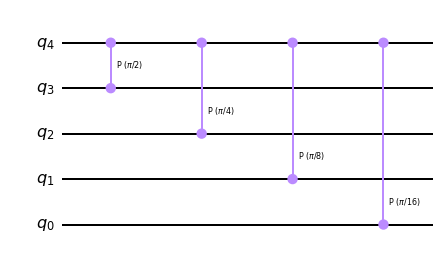

In [3]:
def cpc(n):
    qc = QuantumCircuit(n, name='   CPC')
    for k in range(1, n):
        qc.cp(pi/(2**k), n-1, n-1-k)
    return qc

cpc(5).draw(output='mpl', reverse_bits=True)

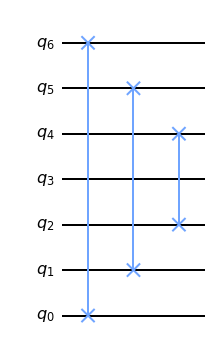

In [4]:
def rev(n):
    qc = QuantumCircuit(n, name='   Rev')
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc

rev(7).draw(output='mpl', reverse_bits=True)

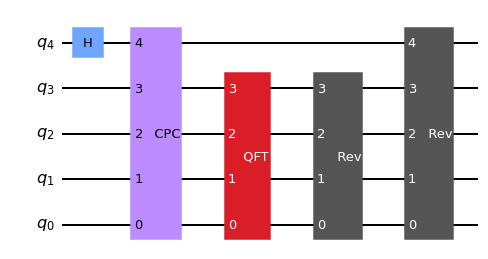

In [5]:
def qft(n):
    qc = QuantumCircuit(n, name=f'  QFT')
    qc.h(n-1)
    if n == 1:
        return qc
    qc.append(cpc(n), range(n))
    qc.append(qft(n-1), range(n-1))
    qc.append(rev(n-1), range(n-1))
    qc.append(rev(n), range(n))

    return qc

qft(5).draw(output='mpl', reverse_bits=True, style={
    "displaycolor": {
        "   Rev": [ # gate name
            "#555555", # box color (grey)
            "#FFFFFF" # box text color (white)
        ],
        "  QFT": [ # gate name
            "#da1e28", # box color (red)
            "#FFFFFF" # box text color (white)
        ],
    }})

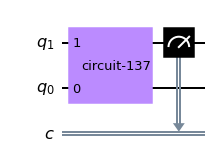

In [6]:
from qiskit import Aer, execute, transpile

# Run the quantum circuit on a statevector simulator backend
#backend = Aer.get_backend('statevector_simulator')

# create circuit with measurement
n = 2
circ = QuantumCircuit(n, n-1)

qc = QuantumCircuit(n)
# qc.y(0)
circ.append(qc, range(n))
circ.measure(range(1,n), range(n-1))
circ.draw(output='mpl', reverse_bits=True)

In [ ]:
from qiskit import Aer, transpile, QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table